# Effect of Loan Attributes on Their Outcomes
## By: Ezekiel Oladiran

## Investigation Overview

In this investigation, I wanted to look at the factors that affect a loan's outcome. For the presentation, I focused on the influence of Loan Amount, Interest Rate and Prosper Score on Loan Outcome. I start by introducing the distribution of loan outcome, followed by the pattern in loan amount distribution, then the pattern of the distribution of interest rate. 

Afterwards, I looked at the effect of loan amount and interest rate on the outcome of the loans, and I went further by looking at how prosper score would influence that effect.


## Dataset Overview

The data consists of information regarding Prosper Loan listings, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The active and cancelled loans were dropped from the dataset so that just the 57,151 inactive loans would be analysed.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Extract the necessary features into a new dataframe
loan_df = df[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 
              'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 
              'ListingCategory (numeric)', 'Occupation', 'StatedMonthlyIncome', 'LoanOriginalAmount']]

In [4]:
# Make a copy of the dataframe
loan_df_clean = loan_df.copy()

In [5]:
# Replace 'NC' in CreditGrade column to NaN
loan_df_clean['CreditGrade'] = loan_df_clean['CreditGrade'].replace('NC', np.NaN)

In [6]:
# combinig loan rating for listings pre-2009 and listings after July 2009
loan_df_clean['LoanGrade'] = loan_df_clean['CreditGrade'].fillna(loan_df_clean['ProsperRating (Alpha)'])

In [7]:
# drop CreditGrade and ProsperRating (Alpha) since we've combined both as LoanGrade
loan_df_clean = loan_df_clean.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1)

In [8]:
# Impute the text representation for the ListingCategory
Loan_cat = {0 : 'Not Available',
           1 : 'Debt Consolidation',
           2 : 'Home Improvement',
           3 : 'Business',
           4 : 'Personal Loan',
           5 : 'Student Use',
           6 : 'Auto',
           7 : 'Other',
           8 : 'Baby & Adoption',
           9 : 'Boat',
           10 : 'Cosmetic Procedure',
           11 : 'Engagement Ring',
           12 : 'Green Loans',
           13 : 'Household Expenses',
           14 : 'Large Purchases',
           15 : 'Medical/Dental',
           16 : 'Motorcycle',
           17 : 'RV',
           18 : 'Taxes',
           19 : 'Vacation',
           20 : 'Wedding Loans'}

def listing_cat(loan_df_clean):
    
    if loan_df_clean['ListingCategory (numeric)'] in Loan_cat:
        category = Loan_cat[loan_df_clean['ListingCategory (numeric)']]
        return category
    else:
        return loan_df_clean['ListingCategory (numeric)']

    
    
loan_df_clean['ListingCategory'] = loan_df_clean.apply(listing_cat, axis=1)

In [9]:
# Drop 'ListingCategory (numeric)'
loan_df_clean = loan_df_clean.drop('ListingCategory (numeric)', axis=1)

In [10]:
# Convert BorrowerAPR and BorrowerRate to percentages 
loan_df_clean['BorrowerAPR'] = round(loan_df_clean['BorrowerAPR']*100, 2) 
loan_df_clean['BorrowerRate'] = round(loan_df_clean['BorrowerRate']*100, 2) 

In [11]:
# Remove active loans
loan_df_clean = loan_df_clean.query("LoanStatus not in ['Current','FinalPaymentInProgress', 'Cancelled']")

In [12]:
# let all the past due loan status read 'Past Due' without the delinquency bucket
loan_df_clean['LoanStatus'] = loan_df_clean['LoanStatus'].str.extract('([a-zA-Z]+[\s]*[a-zA-Z]+)', expand=False)

In [13]:
# Replace 'Past Due' with 'Defaulted'
loan_df_clean['LoanStatus'] = loan_df_clean['LoanStatus'].replace('Past Due', 'Defaulted')

In [14]:
# Convert Term, LoanStatus, PropserScore, and LoanGrade into ordered categorical types
ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Chargedoff', 'Defaulted', 'Completed'],
                   'ProsperScore' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'LoanGrade': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df_clean[var] = loan_df_clean[var].astype(ordered_var)

In [15]:
# Convert ListingCreationDate to datetime
loan_df_clean['ListingCreationDate'] = pd.to_datetime(loan_df_clean['ListingCreationDate'])

In [16]:
# Let's store the dataframe in a much shorter variable name
prosper = loan_df_clean

# reset index
prosper = prosper.reset_index(drop=True)

In [19]:
# define the color variable
base_color = sns.color_palette()[0]

## Distribution of Loan Outcome

The outcome of the loans is generally good, with a large proportion of the loans completed.

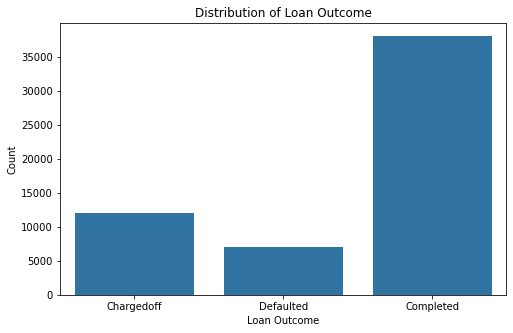

In [21]:
plt.figure(figsize=[8, 5])
sns.countplot(x='LoanStatus', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.ylabel('Count')
plt.title('Distribution of Loan Outcome');

## Distribution of Loan Amount

Plotted on a logarithmic scale, the distribution of Loan Amount appears unimodal with the peak around \\$4,000. A large proportion of listings take on an amount to the nearest thousand or higher (e.g. \\$1,000, \\$2,000, \\$3,000, etc.).

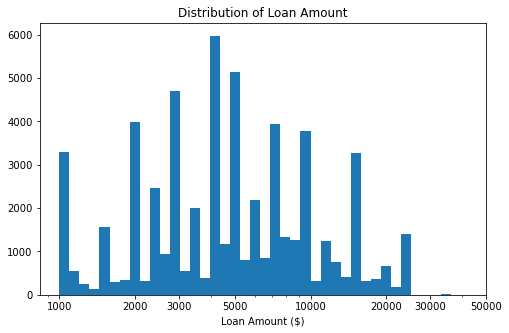

In [22]:
bins = 10 ** np.arange(3, np.log10(prosper['LoanOriginalAmount'].max())+0.04, 0.04)

plt.figure(figsize = (8,5))
plt.hist(x='LoanOriginalAmount', data=prosper, bins=bins)
plt.xscale('log')
plt.xticks([1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000], [1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000])
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount');

## Distribution of Interest Rate

The distribution of the interest rate appears unimodal with the peak a little above 30%. A large proportion of the distribution appears to be between 10% and 30%.

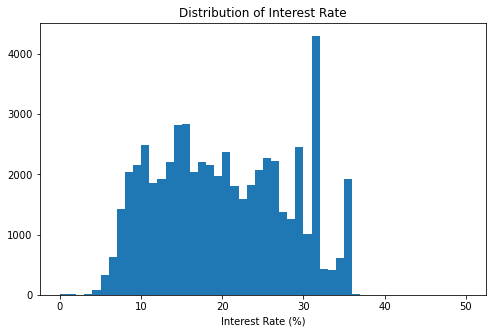

In [23]:
bins = np.arange(0, prosper['BorrowerRate'].max()+1, 1)

plt.figure(figsize = (8,5))
plt.hist(x='BorrowerRate', data=prosper, bins=bins)
plt.xlabel('Interest Rate (%)')
plt.title('Distribution of Interest Rate');

## Loan Outcome by Loan Amount and Interest Rate

There is an interaction effect visible between loan outcome, loan amount and interest rate. As the loan outcome moves from 'Chargedoff' to 'Completed', the distribution of points moves towards the lower left of the plot, thus showing decreased loan amount and decreased interest rate.

In [24]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 49+7, 7)
    bins_y = np.arange(1000, 35000+900, 900)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 10)
    plt.colorbar(label='Count')

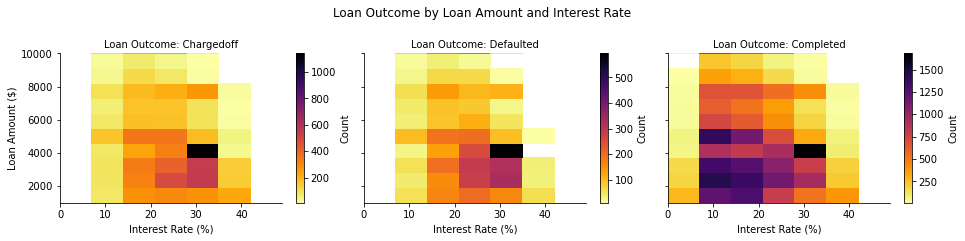

In [36]:
g = sns.FacetGrid(data = prosper, col = 'LoanStatus', height = 3, aspect=1.5)
g.map(hist2dgrid, 'BorrowerRate', 'LoanOriginalAmount', color = 'inferno_r')
g.set(ylim=[1000, 10000])
g.set_titles(col_template='Loan Outcome: {col_name}')
g.set_xlabels('Interest Rate (%)')
g.set_ylabels('Loan Amount ($)')
g.fig.suptitle("Loan Outcome by Loan Amount and Interest Rate", y=1.1);

## Loan Outcome by Loan Amount, Interest Rate, and Prosper Score

We can see how introducing prosper score into the mix affects the loan outcome. Listings with a high prosper score, low interest rate and not so high loan amount (<=\\$7,000) seems to be completed than other listings, while listings with very low prosper scores, high interest rate and low loan amount seems to be chargedoff more than other listings. 

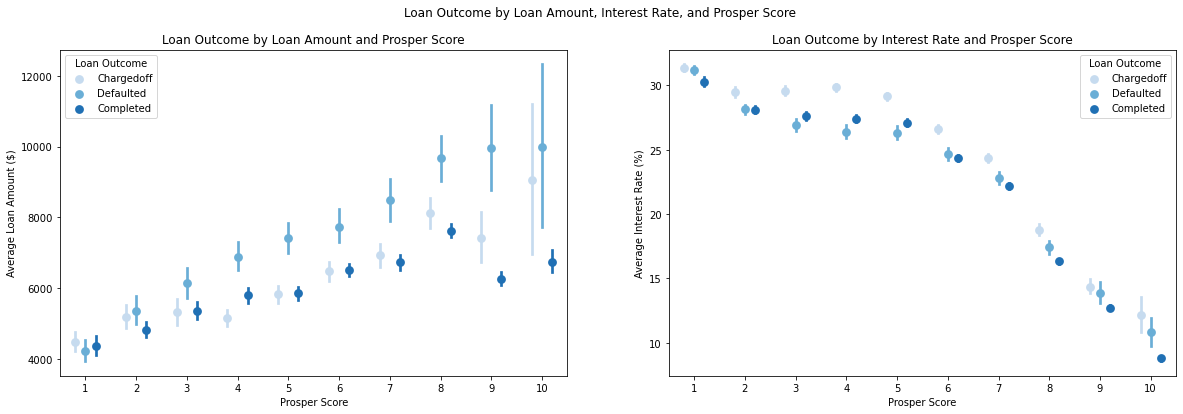

In [38]:
plt.figure(figsize=(20,6))
plt.suptitle('Loan Outcome by Loan Amount, Interest Rate, and Prosper Score')

plt.subplot(1,2,1)
sns.pointplot(x='ProsperScore', y='LoanOriginalAmount', data=prosper, hue='LoanStatus',
              palette='Blues', linestyles='', dodge=0.4)
plt.xlabel('Prosper Score')
plt.ylabel('Average Loan Amount ($)')
plt.title('Loan Outcome by Loan Amount and Prosper Score')
plt.legend(title='Loan Outcome')

plt.subplot(1,2,2)
sns.pointplot(x='ProsperScore', y='BorrowerRate', data=prosper, hue='LoanStatus',
              palette='Blues', linestyles='', dodge=0.4)
plt.xlabel('Prosper Score')
plt.ylabel('Average Interest Rate (%)')
plt.title('Loan Outcome by Interest Rate and Prosper Score')
plt.legend(title='Loan Outcome');

In [ ]:
!jupyter nbconvert Prosper_Loan_Presentation.ipynb --to slides --post serve --no-input --no-prompt